In [1]:
import os

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive/machinel_colab

/content/gdrive/My Drive/machinel_colab


In [3]:
!ls

bank.csv	     diabetestest.csv	flight_test.xlsx   ipl.csv
cardio_refined.csv   diabetestrain.csv	flight_train.xlsx  ipl.pkl
cardio_train.csv     fakenewstest.csv	housetest.csv	   janatatest.csv
Churn_Modelling.csv  fakenewstrain.csv	housetrain.csv	   janatatrain.csv
diabetes.csv	     flight_rf.pkl	housing_train.csv


In [4]:
# Importing essential libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
# Loading the dataset
data = pd.read_csv('ipl.csv')

In [6]:
data.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


In [7]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [8]:
data.shape

(76014, 15)

In [9]:
# Removing columns that arent necessaryu
data.drop(['mid',  'batsman', 'bowler', 'striker', 'non-striker'], axis=1, inplace=True)

In [10]:
data.shape

(76014, 10)

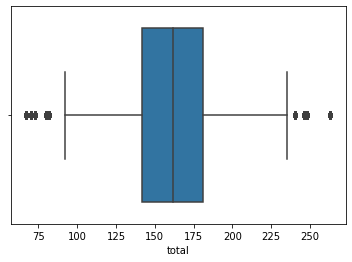

In [11]:
sns.boxplot(data['total'])

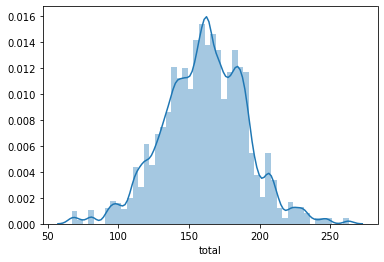

In [12]:
sns.distplot(data['total'])

In [13]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [14]:
#Keeping the teams that are only playing right now
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [15]:
data = data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]

In [16]:
data.shape

(53811, 10)

In [17]:
# Removing the first 5 overs data in every match as we need atleast 5 overs data to predict with
data = data[data['overs']>=5.0]

In [18]:
data.shape

(40108, 10)

In [19]:
data.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [20]:
data['venue'].value_counts()

Eden Gardens                                            4497
M Chinnaswamy Stadium                                   4406
Feroz Shah Kotla                                        4265
Wankhede Stadium                                        4259
MA Chidambaram Stadium, Chepauk                         3734
Punjab Cricket Association Stadium, Mohali              2710
Sawai Mansingh Stadium                                  2516
Rajiv Gandhi International Stadium, Uppal               2221
Sardar Patel Stadium, Motera                            1016
Kingsmead                                               1012
Brabourne Stadium                                        933
Punjab Cricket Association IS Bindra Stadium, Mohali     727
SuperSport Park                                          657
Dubai International Cricket Stadium                      649
Himachal Pradesh Cricket Association Stadium             646
Sheikh Zayed Stadium                                     611
Sharjah Cricket Stadium 

In [21]:
#Taking the stadiums with more number of matches played and also considering the homeground of present teams
consistent_stadiums  = ['M Chinnaswamy Stadium','Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla','Wankhede Stadium', 'Sawai Mansingh Stadium',
'MA Chidambaram Stadium, Chepauk', 'Eden Gardens','Rajiv Gandhi International Stadium, Uppal']
       

In [22]:
data = data[data['venue'].isin(consistent_stadiums)]

In [23]:
data.shape

(28608, 10)

In [24]:
data['venue'].value_counts()

Eden Gardens                                  4497
M Chinnaswamy Stadium                         4406
Feroz Shah Kotla                              4265
Wankhede Stadium                              4259
MA Chidambaram Stadium, Chepauk               3734
Punjab Cricket Association Stadium, Mohali    2710
Sawai Mansingh Stadium                        2516
Rajiv Gandhi International Stadium, Uppal     2221
Name: venue, dtype: int64

In [25]:
print(data['bat_team'].unique())
print(data['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [26]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [27]:
data['date']

32      2008-04-18
33      2008-04-18
34      2008-04-18
35      2008-04-18
36      2008-04-18
           ...    
75884   2017-05-19
75885   2017-05-19
75886   2017-05-19
75887   2017-05-19
75888   2017-05-19
Name: date, Length: 28608, dtype: datetime64[ns]

In [28]:
data.shape

(28608, 10)

In [29]:
# Converting categorical features using OneHotEncoding method
encoded_data = pd.get_dummies(data=data, columns=['bat_team', 'bowl_team','venue'])

In [30]:
encoded_data.shape

(28608, 31)

In [31]:
encoded_data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Wankhede Stadium
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [32]:
encoded_data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla', 'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Wankhede Stadium'],
      dtype='object')

In [33]:
# Rearranging the columns
encoded_data = encoded_data[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad','venue_Eden Gardens',
       'venue_Feroz Shah Kotla', 'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Wankhede Stadium',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

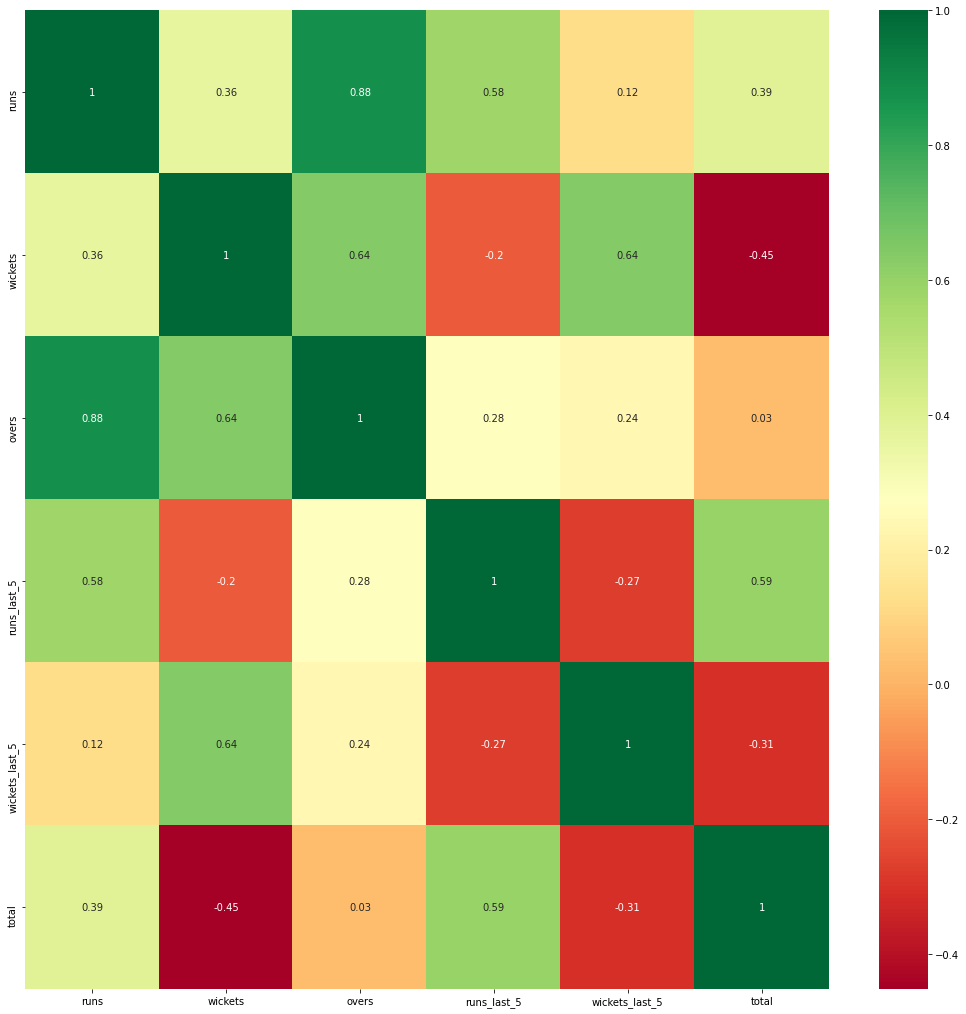

In [34]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [35]:
# Important feature using ExtraTreesRegressor
X = encoded_data.drop(['total','date'],axis=1)
y = encoded_data['total']
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

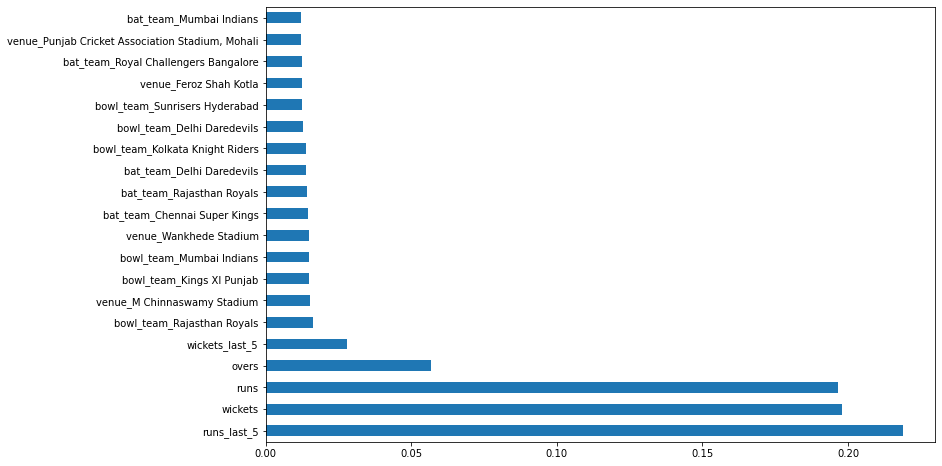

In [36]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

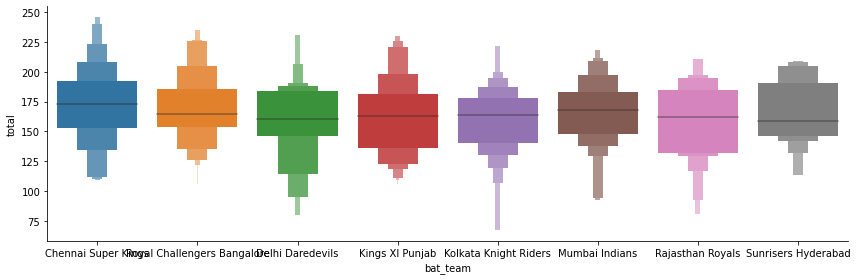

In [37]:
#batting team and total runs relation

sns.catplot(y = "total", x = "bat_team", data = data.sort_values("total", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

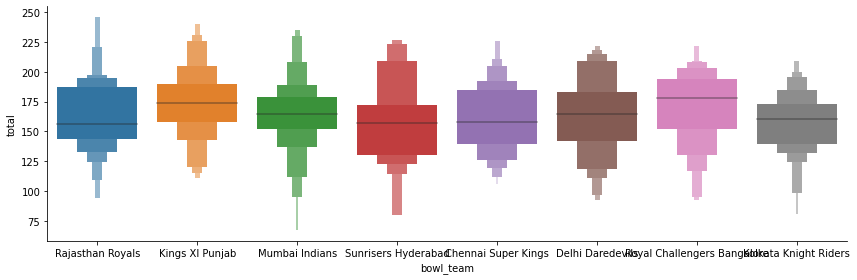

In [38]:
sns.catplot(y = "total", x = "bowl_team", data = data.sort_values("total", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

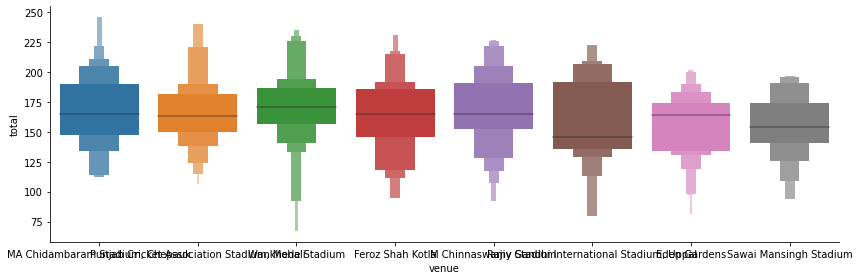

In [39]:
sns.catplot(y = "total", x = "venue", data = data.sort_values("total", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

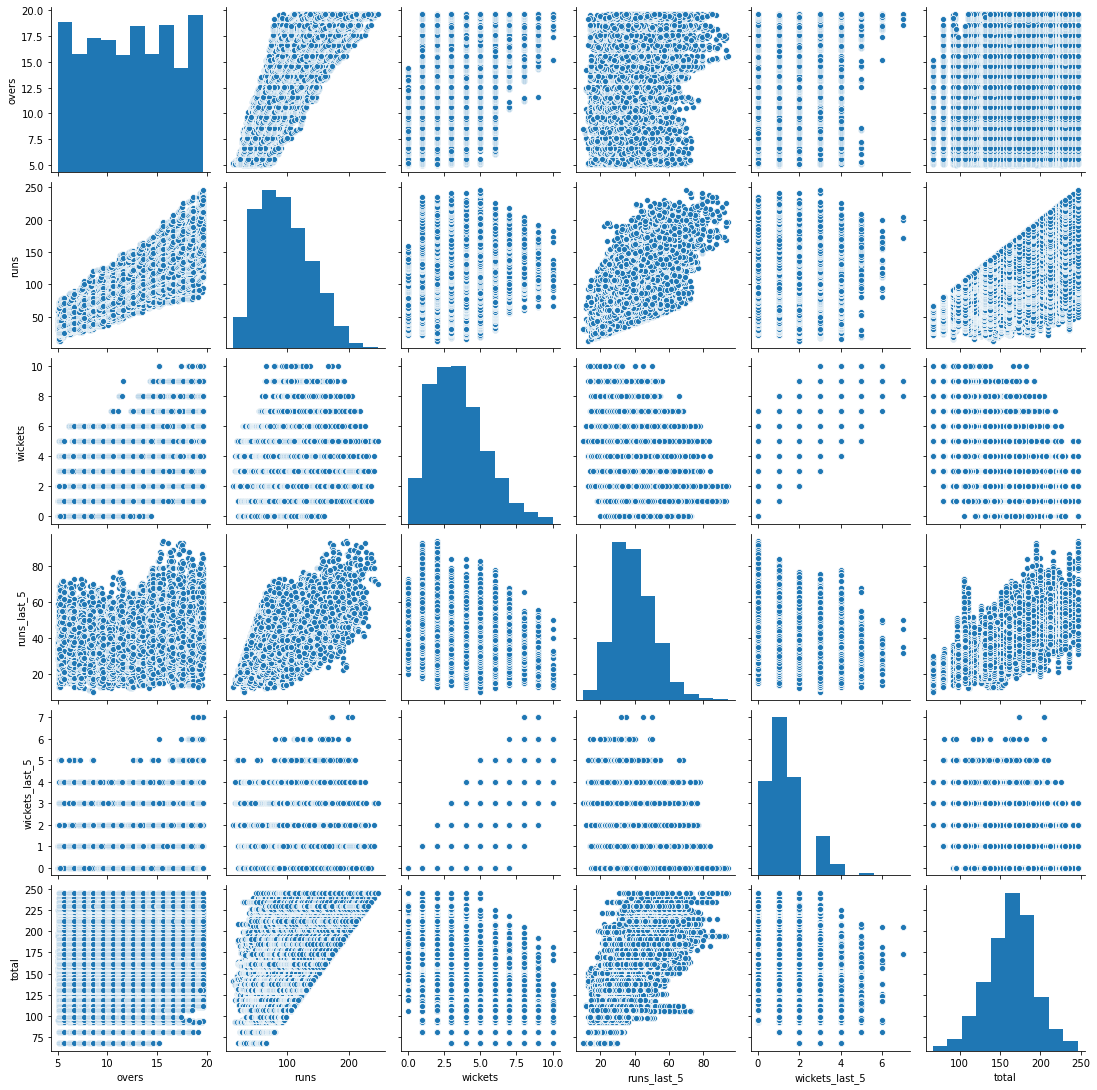

In [40]:
sns.pairplot(encoded_data[['overs' ,	'runs', 'wickets'	,'runs_last_5' ,'wickets_last_5','total']])

## Checking wheather the data is Gaussian Distributed

In [41]:
from scipy.stats import probplot

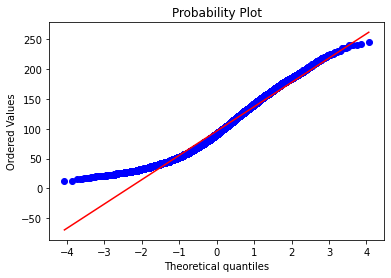

In [42]:
import pylab
probplot(encoded_data['runs'],dist='norm',plot=pylab)
plt.show()

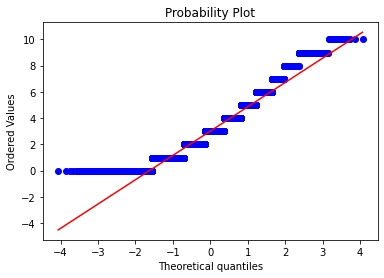

In [43]:
probplot(encoded_data['wickets'],dist='norm',plot=pylab)
plt.show()

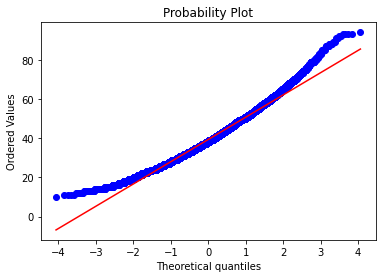

In [44]:
probplot(encoded_data['runs_last_5'],dist='norm',plot=pylab)
plt.show()

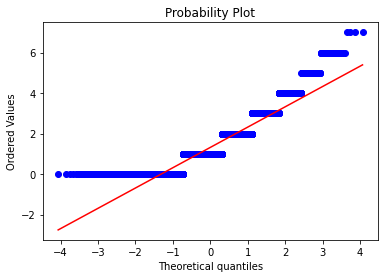

In [45]:
probplot(encoded_data['wickets_last_5'],dist='norm',plot=pylab)
plt.show()

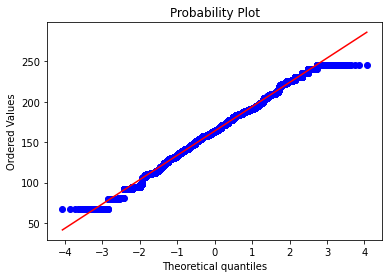

In [46]:
probplot(encoded_data['total'],dist='norm',plot=pylab)
plt.show()

In [48]:
# Splitting the data into train and test set.Since it is a time series data we are spliting on the basis of time.. We are using the data
X_train = encoded_data.drop(labels='total', axis=1)[encoded_data['date'].dt.year <= 2016]
X_test = encoded_data.drop(labels='total', axis=1)[encoded_data['date'].dt.year >= 2017]

In [49]:
X_train

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5
32,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.1,61,0,59,0
33,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.2,61,1,59,1
34,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.3,61,1,59,1
35,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.4,61,1,59,1
36,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.5,61,1,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,2016-05-29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,19.2,194,7,54,4
68858,2016-05-29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,19.3,200,7,56,4
68859,2016-05-29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,19.4,201,7,56,4
68860,2016-05-29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,19.5,202,7,57,4


In [50]:
y_train = encoded_data[encoded_data['date'].dt.year <= 2016]['total'].values
y_test = encoded_data[encoded_data['date'].dt.year >= 2017]['total'].values

In [51]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [52]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred = regressor.predict(X_test)

In [54]:
from sklearn import metrics

## Regression Evaluation Metrics

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 11.288121399950837
MSE: 217.05389589770928
RMSE: 14.73274909505043


In [56]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

## Lasso Regression with GridSearch

In [57]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
y_predl = lasso_regressor.predict(X_test)

{'alpha': 1}
-343.1309689444174


## Regression Evaluation Metrics

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predl))
print('MSE:', metrics.mean_squared_error(y_test, y_predl))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predl)))

MAE: 11.119955248920911
MSE: 203.82449147580928
RMSE: 14.276711507760087


## Ridge Regression with GridSearch

In [59]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

ridge_regressor.fit(X_train,y_train)
y_predr = ridge_regressor.predict(X_test)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-350.0187301130442


## Regression Evaluation Metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predr))
print('MSE:', metrics.mean_squared_error(y_test, y_predr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predr)))

MAE: 11.27473307791391
MSE: 216.49968903350214
RMSE: 14.713928402486609


## Trying out Multiple Models

In [61]:
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [62]:
svr = LinearSVR()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
knr = KNeighborsRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [63]:
models = list([svr,dtr,gbr,knr,rf,xgb])

In [64]:
%%time
model_rmse = []
for i in models:
  i.fit(X_train,y_train)
  i_pred = i.predict(X_test)
  model_rmse.append(np.sqrt(metrics.mean_squared_error(y_test,i_pred)))

[03:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 19.1 s, sys: 285 ms, total: 19.4 s
Wall time: 19.4 s


In [65]:
model_rmse

[22.374423465900495,
 24.55820385012076,
 16.913957845310186,
 18.871547223893856,
 19.134194669084156,
 17.24991658571352]

In [66]:
#Saving the model
pickle.dump(lasso_regressor,open('ipl.pkl','wb'))